# Multi-Scenario MORDM

Multi-scenario MORMD is an extension of normal MORDM to better include robustness considerations within the search phase. It starts from the scenario discovery results resulting from MORDM. Next, from the experiments within this box, a set of scenarios is selected. 

There are many ways of selecting the additional scenarios. The original paper which introduced multi-scenario MORMD [Watson and Kaspzryk (2017)](https://doi.org/10.1016/j.envsoft.2016.12.001) did it in a more or less adhoc manner. [Eker and Kwakkel (2018)](https://doi.org/10.1016/j.envsoft.2018.03.029) introduced a more formal selection approach, the code of which can be found on [GitHub](https://github.com/sibeleker/MORDM---Multi-scenario-search). 

For this assignment, make an informed selection of 4 scenarios, using an approach of your choice. Motivate carefully your selection procedure. 


In [1]:
# Import the lake model function from dps_lake_model.py


from dps_lake_model import lake_model, get_antropogenic_release

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario)

from ema_workbench.analysis import parcoords
from ema_workbench.util.utilities import load_results, save_results

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ema_logging.log_to_stderr(ema_logging.INFO)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_model)
lake_model.time_horizon = 100

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter('c1', -2, 2),
                    RealParameter('c2', -2, 2),
                    RealParameter('r1', 0, 2),
                    RealParameter('r2', 0, 2),
                    RealParameter('w1', 0, 1)] 

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P', kind=ScalarOutcome.MINIMIZE),
                       ScalarOutcome('utility', kind=ScalarOutcome.MAXIMIZE),
                       ScalarOutcome('inertia', kind=ScalarOutcome.MAXIMIZE),
                       ScalarOutcome('reliability', kind=ScalarOutcome.MAXIMIZE)]

lake_model.constantcs = [Constant('alpha', 0.41),
                         Constant('reps', 150)]



C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
from ema_workbench import load_results


fn = r'./results/selected_results.tar.gz'
x, outcomes = load_results(fn)

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\Week 5-6 - robustness and direct search\results\selected_results.tar.gz


In [3]:
#Four scenarios are chosen randomly and assigned to b'x', q'x', mean'x', stdex'x'

x_selected = x.sample(n = 4) 
ind = x_selected.index
x_selected

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,policy,model
732,0.439227,0.952889,0.032780,3.706154,0.002011,0.255996,0.021601,0.468509,1.46985,0.318274,Policy 8,lakeproblem
137,0.183117,0.976542,0.034456,4.498258,0.004772,0.255996,0.021601,0.468509,1.46985,0.318274,Policy 8,lakeproblem
560,0.220569,0.968402,0.044987,3.918449,0.004313,0.255996,0.021601,0.468509,1.46985,0.318274,Policy 8,lakeproblem
136,0.294469,0.938136,0.042364,2.420584,0.004776,0.255996,0.021601,0.468509,1.46985,0.318274,Policy 8,lakeproblem


In [4]:
outcomes

{'max_P': array([0.09488495, 0.15185991, 0.10517841, 0.10739806, 0.11375531,
        5.89852524, 4.66077114, 0.11338466, 0.10813841, 0.1709426 ,
        0.11627514, 0.1349605 , 0.13480213, 0.1781584 , 0.1691225 ,
        0.11730844, 0.09837471, 0.10631825, 6.47914313, 0.25346915,
        0.14397755, 0.15623307, 0.17050614, 0.15205315, 0.09279803,
        0.19414018, 0.1581326 , 0.29089625, 1.8916825 , 0.19956117,
        0.09898544, 3.05875016, 0.11407894, 0.13911068, 0.14348414,
        0.13077604, 0.27740248, 0.16765789, 0.21749711, 3.94568175,
        0.11063452, 0.11220651, 6.47679051, 0.17576865, 0.21426479,
        0.09917386, 0.10142049, 0.13042012, 3.10271847, 3.77958236,
        0.13400291, 0.30812975, 0.1313732 , 0.16792026, 0.09646158,
        5.37604078, 0.12650392, 0.11687904, 3.92428649, 0.10320701,
        0.20005805, 3.73211363, 0.08811471, 0.17630836, 0.15061688,
        5.56937721, 0.08607794, 4.60184027, 0.10097605, 0.09077079,
        0.13246172, 0.23339939, 0.15448

In [5]:

for i in range(4):
    globals()["b" + str(i)] = x_selected.iloc[i]['b']
    globals()["q" + str(i)] = x_selected.iloc[i]['q']
    globals()["mean" + str(i)] = x_selected.iloc[i]['mean']
    globals()["stdev" + str(i)] = x_selected.iloc[i]['stdev']

## Search for each scenario

For each of the four selected scenarios, use many-objective optimization to find a pareto approximate set using the same approach as for assignment 8. Remember to check for convergence (and time permitting, seed analysis), and be careful in what epsilon values to use (not to coarse, not too small). 

Store the resulting set of pareto solutions in a smart way for subsequent analysis.


In [7]:
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,5)),
                       ScalarOutcome('utility', kind=ScalarOutcome.MAXIMIZE,
                                     expected_range=(0,2)),
                       ScalarOutcome('inertia', kind=ScalarOutcome.MAXIMIZE,
                                    expected_range=(0,1)),
                       ScalarOutcome('reliability', kind=ScalarOutcome.MAXIMIZE,
                                     expected_range=(0,1))]

convergence_metrics = [HyperVolume.from_outcomes(lake_model.outcomes),
                       EpsilonProgress()]


In [8]:
#Search scenario 1
reference = Scenario('reference', b=b0, q=q0, mean=mean0, stdev=stdev0)

with MultiprocessingEvaluator(lake_model) as evaluator:
    results_01 = evaluator.optimize(searchover='levers', nfe=1000,
                        epsilons=[0.1, ] * len(lake_model.outcomes),
                        convergence=convergence_metrics, reference=reference)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 499/1000 nfe
[MainProcess/INFO] generation 10: 995/1000 nfe
[MainProcess/INFO] optimization completed, found 4 solutions
[MainProcess/INFO] terminating pool


In [9]:
#Search scenario 2
reference = Scenario('reference', b=b1, q=q1, mean=mean1, stdev=stdev1)

with MultiprocessingEvaluator(lake_model) as evaluator:
    results_02 = evaluator.optimize(searchover='levers', nfe=1000,
                        epsilons=[0.1, ] * len(lake_model.outcomes),
                        convergence=convergence_metrics, reference=reference)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 492/1000 nfe
[MainProcess/INFO] generation 10: 988/1000 nfe
[MainProcess/INFO] optimization completed, found 11 solutions
[MainProcess/INFO] terminating pool


In [10]:
#Search scenario 3
reference = Scenario('reference', b=b2, q=q2, mean=mean2, stdev=stdev2)

with MultiprocessingEvaluator(lake_model) as evaluator:
    results_03 = evaluator.optimize(searchover='levers', nfe=1000,
                        epsilons=[0.01, ] * len(lake_model.outcomes),
                        convergence=convergence_metrics, reference=reference)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 496/1000 nfe
[MainProcess/INFO] generation 10: 995/1000 nfe
[MainProcess/INFO] optimization completed, found 73 solutions
[MainProcess/INFO] terminating pool


In [11]:
#Search scenario 4
reference = Scenario('reference', b=b3, q=q3, mean=mean3, stdev=stdev3)

with MultiprocessingEvaluator(lake_model) as evaluator:
    results_04 = evaluator.optimize(searchover='levers', nfe=1000,
                        epsilons=[0.01, ] * len(lake_model.outcomes),
                        convergence=convergence_metrics, reference=reference)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] generation 5: 493/1000 nfe
[MainProcess/INFO] generation 10: 986/1000 nfe
[MainProcess/INFO] optimization completed, found 23 solutions
[MainProcess/INFO] terminating pool


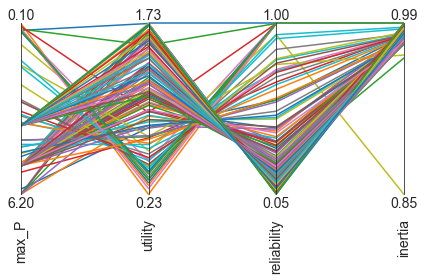

In [12]:
results_all = [results_01[0], results_02[0], results_03[0], results_04[0]]
#pd.DataFrame(results_03[0])
results_all = pd.concat(results_all, ignore_index=True)

outcomes = results_all.loc[:, ['max_P', 'utility', 'reliability', 'inertia']]

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)


axes.invert_axis('max_P')

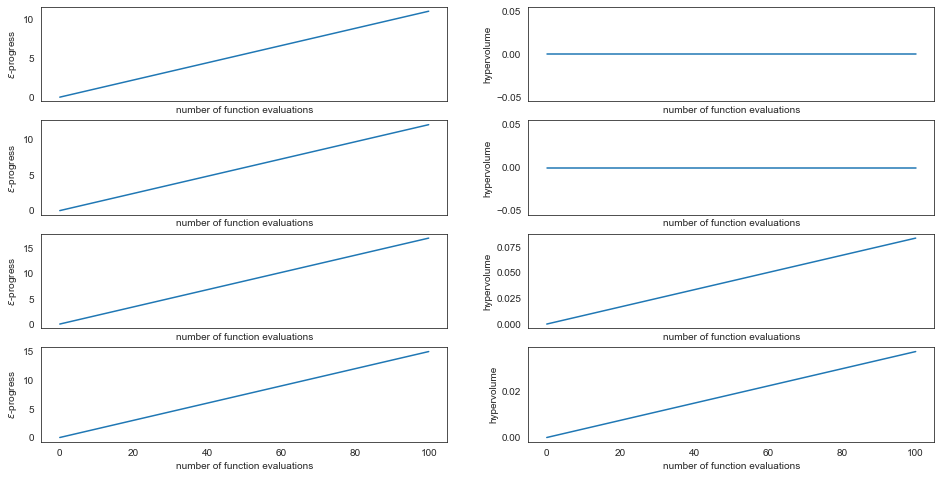

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols=2, sharex=True, figsize=(16,8))

ax1[0].plot(results_01[1].nfe, results_01[1].epsilon_progress)
ax1[0].set_ylabel('$\epsilon$-progress')
ax1[1].plot(results_01[1].nfe, results_01[1].hypervolume)
ax1[1].set_ylabel('hypervolume')

ax2[0].plot(results_02[1].nfe, results_02[1].epsilon_progress)
ax2[0].set_ylabel('$\epsilon$-progress')
ax2[1].plot(results_02[1].nfe, results_02[1].hypervolume)
ax2[1].set_ylabel('hypervolume')

ax3[0].plot(results_03[1].nfe, results_03[1].epsilon_progress)
ax3[0].set_ylabel('$\epsilon$-progress')
ax3[1].plot(results_03[1].nfe, results_03[1].hypervolume)
ax3[1].set_ylabel('hypervolume')

ax4[0].plot(results_04[1].nfe, results_04[1].epsilon_progress)
ax4[0].set_ylabel('$\epsilon$-progress')
ax4[1].plot(results_04[1].nfe, results_04[1].hypervolume)
ax4[1].set_ylabel('hypervolume')

ax1[0].set_xlabel('number of function evaluations')
ax1[1].set_xlabel('number of function evaluations')
ax2[0].set_xlabel('number of function evaluations')
ax2[1].set_xlabel('number of function evaluations')
ax3[0].set_xlabel('number of function evaluations')
ax3[1].set_xlabel('number of function evaluations')
ax4[0].set_xlabel('number of function evaluations')
ax4[1].set_xlabel('number of function evaluations')
plt.show()

In [14]:
results_all.to_csv('assignment9_results_all.csv', index = False)

## Re-evaluate under deep uncertainty

Combine the pareto set of solutions found for each scenario. Next, turn each solution into a policy object. If you have a very large number of policies, you can choose to down sample your policies in some reasoned way (*e.g.*, picking min and max on each objective, slicing across the pareto front with a particular step size). As a rule of thumb, try to limit the set of policies to at most 50. 

Re-evaluate the combined set of solutions over 1000 scenarios sampled using LHS.


In [15]:
results = pd.read_csv('assignment9_results_all.csv')
results

,c1,c2,r1,r2,w1,max_P,utility,inertia,reliability
0,1.766799,1.323154,1.989410,1.717507,0.157849,0.346331,1.734761,0.9900,1.0000
1,0.252330,-0.005948,0.535259,1.411117,0.432154,0.099356,0.233583,0.9900,1.0000
2,-1.654092,0.889194,1.692942,1.373449,0.005624,0.299936,1.543840,0.9900,1.0000
3,0.831980,0.627744,1.632145,1.820920,0.864754,0.199488,0.953183,0.9900,1.0000
4,-1.796209,-0.678994,1.515398,1.742569,0.370260,6.194100,1.734761,0.9900,0.0700
...,...,...,...,...,...,...,...,...,...
106,0.885629,0.074177,1.564683,0.855013,0.327390,3.747355,1.508133,0.9760,0.1014
107,-0.043046,0.072233,0.921342,0.405395,0.780416,3.746779,1.431148,0.9737,0.1213
108,0.199112,-0.713163,1.575971,1.752821,0.773699,3.746828,1.486264,0.9817,0.1044
109,0.088620,-0.658123,1.913434,1.692721,0.783348,3.747579,1.453601,0.9804,0.1118


In [64]:
#assume that analyst will be interested in high reliabiltiy and intertia
results = results[results["reliability"]>0.9]
results = results[results["inertia"] > 0.9]
results.to_csv('mordm_policy.csv', index = False)

In [26]:
from ema_workbench import Policy

policy = []

for i in range(len(results)):
    pol = Policy(name="Policy " + str(i), 
                        c1 = results.iloc[i,0] , 
                        c2 = results.iloc[i,1], 
                        r1 = results.iloc[i,2], 
                        r2 = results.iloc[i,3], 
                        w1 = results.iloc[i,4])
    policy.append(pol)

policy

[Policy({'c1': 1.7667987168668358, 'c2': 1.3231540724101012, 'r1': 1.9894103344214336, 'r2': 1.7175069796047406, 'w1': 0.15784925643182934}),
 Policy({'c1': 0.2523300777909193, 'c2': -0.005948450765453917, 'r1': 0.5352591911739453, 'r2': 1.4111171737543613, 'w1': 0.4321543254976152}),
 Policy({'c1': -1.6540915821244155, 'c2': 0.8891944804226657, 'r1': 1.6929424982435726, 'r2': 1.3734490901359289, 'w1': 0.005623757022340303}),
 Policy({'c1': 0.8319796554317564, 'c2': 0.6277438094802081, 'r1': 1.6321451974912558, 'r2': 1.8209196660746323, 'w1': 0.8647537709526393}),
 Policy({'c1': 0.5243345784818905, 'c2': 0.5225610653949461, 'r1': 0.6081932341084988, 'r2': 0.4726186840089989, 'w1': 0.4314698358938145}),
 Policy({'c1': 0.1992274309377833, 'c2': 0.4758689654489472, 'r1': 1.2125275786942078, 'r2': 0.6100527754905889, 'w1': 0.5226450263129822}),
 Policy({'c1': 0.5325770302044299, 'c2': 0.29614811953422604, 'r1': 0.9499695878436863, 'r2': 1.6854390804829644, 'w1': 0.9880130698274716}),
 Poli

In [27]:
with MultiprocessingEvaluator(lake_model) as evaluator:
    new_experiments, new_outcomes = evaluator.perform_experiments(scenarios=1000, policies=policy,
                                                                  uncertainty_sampling="lhs")

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 16 policies * 1 model(s) = 16000 experiments
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9600 cases completed
[MainProcess/INFO] 11200 cases completed
[MainProcess/INFO] 12800 cases completed
[MainProcess/INFO] 14400 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


Calculate both the maximum regret, and the domain criterion using the values provided in [Bartholomew and Kwakkel (2020)](https://doi.org/10.1016/j.envsoft.2020.104699). Ignore the max_P objective.

visualize the results in parallel coordinate plot. 

Are there any promising compromise solutions which balance performance in both the reference scenarios as well as in terms of their robustness?


In [32]:
optimal = pd.concat([new_experiments, pd.DataFrame(new_outcomes)], axis=1)
optimal

,b,delta,mean,q,stdev,c1,c2,r1,r2,w1,scenario,policy,model,max_P,utility,inertia,reliability
0,0.233425,0.935696,0.048933,3.861549,0.002614,1.766799,1.323154,1.98941,1.717507,0.157849,0,Policy 0,lakeproblem,4.913627,0.552429,0.9800,0.0670
1,0.369274,0.967458,0.027484,3.729955,0.004760,1.766799,1.323154,1.98941,1.717507,0.157849,1,Policy 0,lakeproblem,3.010725,1.093337,0.9722,0.2979
2,0.343153,0.954583,0.038582,2.469901,0.002004,1.766799,1.323154,1.98941,1.717507,0.157849,2,Policy 0,lakeproblem,3.157733,0.751889,0.9712,0.0600
3,0.160633,0.978976,0.018493,2.190596,0.003725,1.766799,1.323154,1.98941,1.717507,0.157849,3,Policy 0,lakeproblem,6.874512,1.576831,0.9784,0.0214
4,0.246487,0.947720,0.042797,4.055071,0.002233,1.766799,1.323154,1.98941,1.717507,0.157849,4,Policy 0,lakeproblem,4.628921,0.681792,0.9701,0.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.220025,0.944277,0.044085,3.750725,0.004538,0.134436,0.441028,1.45382,0.203994,0.841922,995,Policy 15,lakeproblem,0.359573,0.227687,0.9900,1.0000
15996,0.365623,0.935919,0.026964,3.199351,0.001835,0.134436,0.441028,1.45382,0.203994,0.841922,996,Policy 15,lakeproblem,0.308308,0.444169,0.9849,1.0000
15997,0.128099,0.941546,0.019334,4.435909,0.001723,0.134436,0.441028,1.45382,0.203994,0.841922,997,Policy 15,lakeproblem,0.352138,0.243331,0.9900,1.0000
15998,0.164588,0.985147,0.046613,3.020588,0.001548,0.134436,0.441028,1.45382,0.203994,0.841922,998,Policy 15,lakeproblem,6.949402,1.974335,0.9702,0.0406


In [54]:
maximum_regret = pd.DataFrame(columns = ["policy", "max_P", "utility", "inertia", "reliability"])

for p in new_experiments["policy"].unique():
    
    for s in new_experiments["scenario"].unique():
    
        sindex = new_experiments[new_experiments["scenario"] == s].index
        pindex = new_experiments[new_experiments["scenario"] == s].index & new_experiments[new_experiments["policy"] == p].index

        max_P = max(max_P, new_outcomes["max_P"][pindex] - new_outcomes["max_P"][sindex].min())
        utility = max(utility, new_outcomes["utility"][pindex] - new_outcomes["utility"][sindex].min())
        inertia = max(inertia, new_outcomes["inertia"][pindex] - new_outcomes["inertia"][sindex].min())
        reliability = max(reliability, new_outcomes["reliability"][pindex] - new_outcomes["reliability"][sindex].min())

        policy_line = [p, max_P, utility, inertia, reliability]

        maximum_regret = maximum_regret.append(pd.Series(policy_line, index=["policy", "max_P", "utility", "inertia", "reliability"]), ignore_index=True) 

In [63]:
maximum_regret_agg = maximum_regret.groupby('policy').agg({'max_P': 'min', 'utility': 'min',
                                                              'inertia': 'min', 'reliability': 'min'})
#maximum_regret[maximum_regret["policy"] == "Policy 0"]
maximum_regret_agg

,max_P,utility,inertia,reliability
policy,,,,
Policy 0,4.626300,0.440645,0.8215,0.010
Policy 1,10.722576,2.094794,0.8215,0.933
Policy 10,10.722671,2.094794,0.8215,0.960
Policy 11,10.722671,2.094794,0.8215,0.960
Policy 12,10.722671,2.094794,0.8215,0.960
Policy 13,10.722671,2.094794,0.8215,0.960
Policy 14,10.722671,2.094794,0.8215,0.960
Policy 15,10.722671,2.094794,0.8215,0.960
Policy 2,10.722576,2.094794,0.8215,0.960


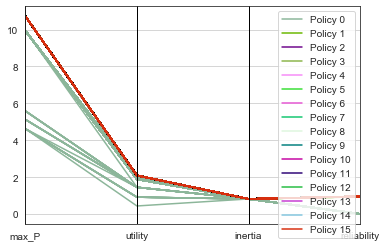

In [62]:
plt.figure()
pd.plotting.parallel_coordinates(maximum_regret, "policy")

In [61]:
save_results = maximum_regret_agg[maximum_regret_agg["reliability"]>0.9].sort_values(by=["max_P"], ascending=True).head()
save_results.to_csv('assignment9_results_selected.csv', index = False)

- Policy 0 has lowest maximum regret value at reliability, therefore it is best policy